['00_233_134_2016-05-20.csv' '01_233_134_2016-06-25.csv'
 '02_233_134_2016-07-11.csv' '03_233_134_2016-07-04.csv'
 '04_233_134_2016-07-02.csv' '05_233_134_2016-06-16.csv'
 '06_233_134_2016-07-13.csv' '07_233_134_2016-07-07.csv'
 '08_233_134_2016-06-19.csv' '09_233_134_2016-06-30.csv'
 '10_233_134_2016-06-29.csv']
Index(['hw_mean', 'sdmc_mean', 'zw_mean', 'ZD_CNT', 'ZD_LCG', 'ZD_TFG',
       'ZD_JHG', 'ZD_LLJ', 'ZD_SPEED'],
      dtype='object')
(919,)
(919, 2)


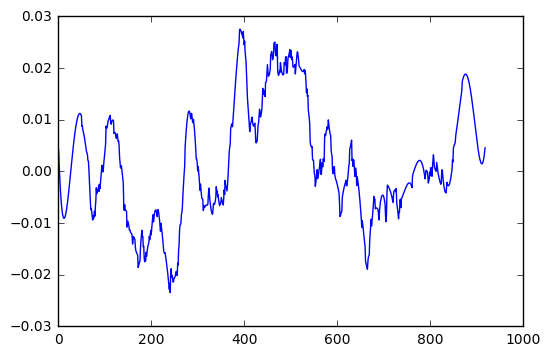

In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from preprocess import base
from ffx_learn import learn_ffx
from ffx_learn import call_ffx

root_dir = os.getcwd()
data_dir = root_dir + "/data_0134/integrated_temp_sdmc_mean/"
filelist = base.get_files_csv(data_dir)
print(filelist)

file = filelist[0]
data = pd.read_csv(data_dir+file)
del data['BTSJ']
print(data.columns)

from scipy.signal import savgol_filter

df = data[['hw_mean', 'zw_mean']].copy()
df = (df-df.mean())/df.std()
df['hw_mean'] = savgol_filter(df['hw_mean'], 101, 5)
df['zw_mean'] = savgol_filter(df['zw_mean'], 101, 5)
y = df['hw_mean'].diff()
X = df.as_matrix()
print(y.shape)
print(X.shape)
plt.plot(y)
plt.show()

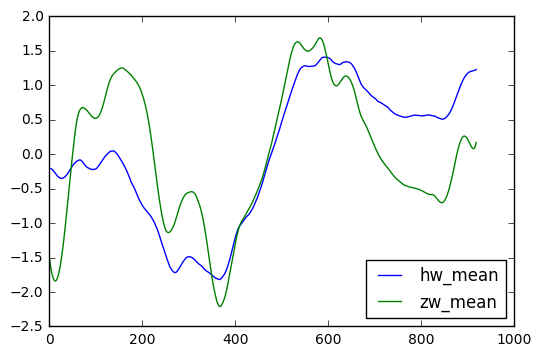

In [32]:
plt.plot(df['hw_mean'])
plt.plot(df['zw_mean'])
plt.legend(loc='best')
plt.show()

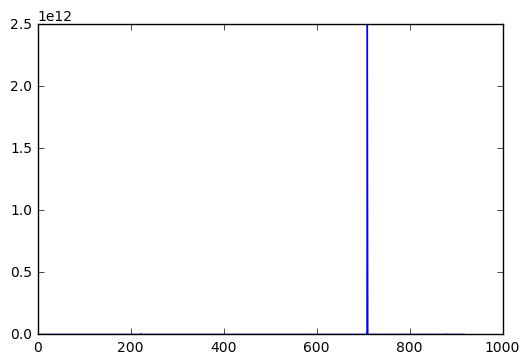

In [27]:
#square(2*hw_mean/square(zw_mean))
test = np.power(2*df['hw_mean']/np.power(df['zw_mean'],2),2)
plt.plot(test)
plt.show()